In [1]:
%load_ext autoreload

In [9]:
%autoreload
%matplotlib inline

import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py

from core.load_data import clean_support_data, load_imgs
from core.cluster_data import cluster_support_data
from core.preprocess_data import select_features, get_price_per_sm_dev, remove_outliers, scale_data, MMscale_data, apply_pca
from core.visualize_data import plot_cluster_results, plot_cluster_results_3d
import core.const as const

# Capstone project

## Load supporting data from homes

The first step will be loading and cleaning the data from the supporting dataset. Then some preprocessing will be performed, and some clustering algorithms tested, to obtain an order of magnitude of the results we might obtain with the Main dataset.

### Clean dataset

In [3]:
data_path = "./data/"
support_df = clean_support_data(data_path + "supporting_dataset.xlsx")

### Profile the dataset

Using pandas profiling library the dataset is profiled.

In [106]:
cols_to_display =[col for col in support_df.columns if col not in const.EXCLUDED_COLS]
pandas_profiling.ProfileReport(support_df[cols_to_display])

Number of variables,21
Number of observations,1570
Total Missing (%),0.0%
Total size in memory,108.9 KiB
Average record size in memory,71.0 B
Numeric,20
Categorical,1
Date,0
Text (Unique),0
Rejected,0
Distinct count,9


### Remove outliers and scale data

In [4]:
processed_df = get_price_per_sm_dev(support_df)
processed_df = remove_outliers(processed_df)
processed_df = MMscale_data(processed_df)

C:\Users\Javier.Garciadeleani\AppData\Local\Continuum\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



In [5]:
#processed_df = pd.get_dummies(processed_df[const.IN_COLS])
processed_df = processed_df[const.IN_COLS]

In [6]:
processed_df.head()

,ID,bathrooms,exterior,hasAircon,hasCupboards,hasGarden,hasLift,hasPool,hasStorage,hasTerrace,...,price_per_sm,size,hasFurniture,hasGarage,rooms,north_oriented,east_oriented,west_oriented,south_oriented,hasEquippedKitchen
0,1053095,0.4,True,True,True,False,True,False,False,False,...,0.273728,0.677966,False,False,0.500000,False,False,False,False,True
1,1064149,0.0,False,True,True,False,True,False,False,False,...,0.769393,0.118644,True,False,0.000000,False,False,False,True,True
2,1079168,0.2,True,True,False,False,True,False,False,False,...,0.627480,0.254237,True,False,0.333333,False,True,True,True,True
3,1087918,0.0,True,True,True,False,True,False,False,False,...,0.617823,0.149153,False,False,0.333333,False,True,False,False,True
4,1279578,0.4,True,True,False,False,True,False,False,True,...,0.460888,0.593220,False,True,0.666667,False,False,False,True,True


In [158]:
cols_to_display =[col for col in processed_df.columns if col not in const.EXCLUDED_COLS]
pandas_profiling.ProfileReport(processed_df[cols_to_display])

Number of variables,4
Number of observations,1313
Total Missing (%),0.0%
Total size in memory,41.1 KiB
Average record size in memory,32.1 B
Numeric,4
Categorical,0
Date,0
Text (Unique),0
Rejected,0
Distinct count,1313


In [226]:
best_clst = cluster_support_data(processed_df, option="kmeans", n_clusters_list=range(2, 21), verbose=1)

Silhouette score of 0.4464 with kmeans and 2 clusters
Silhouette score of 0.2873 with kmeans and 3 clusters
Silhouette score of 0.2616 with kmeans and 4 clusters
Silhouette score of 0.2618 with kmeans and 5 clusters
Silhouette score of 0.2567 with kmeans and 6 clusters
Silhouette score of 0.2392 with kmeans and 7 clusters
Silhouette score of 0.2378 with kmeans and 8 clusters
Silhouette score of 0.2434 with kmeans and 9 clusters
Silhouette score of 0.2511 with kmeans and 10 clusters
Silhouette score of 0.2454 with kmeans and 11 clusters
Silhouette score of 0.2468 with kmeans and 12 clusters
Silhouette score of 0.2479 with kmeans and 13 clusters
Silhouette score of 0.2499 with kmeans and 14 clusters
Silhouette score of 0.2489 with kmeans and 15 clusters
Silhouette score of 0.2475 with kmeans and 16 clusters
Silhouette score of 0.2555 with kmeans and 17 clusters
Silhouette score of 0.2529 with kmeans and 18 clusters
Silhouette score of 0.2546 with kmeans and 19 clusters
Silhouette score o

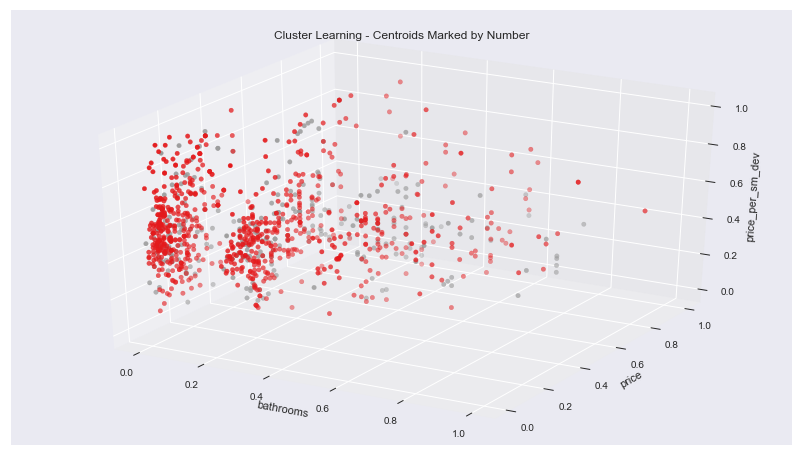

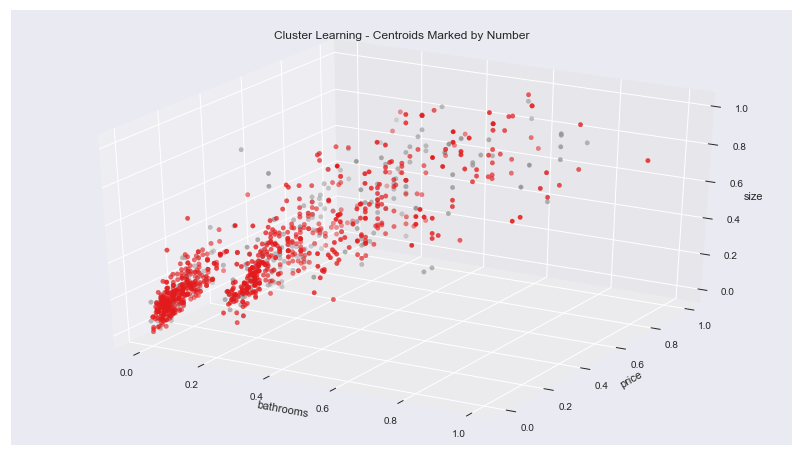

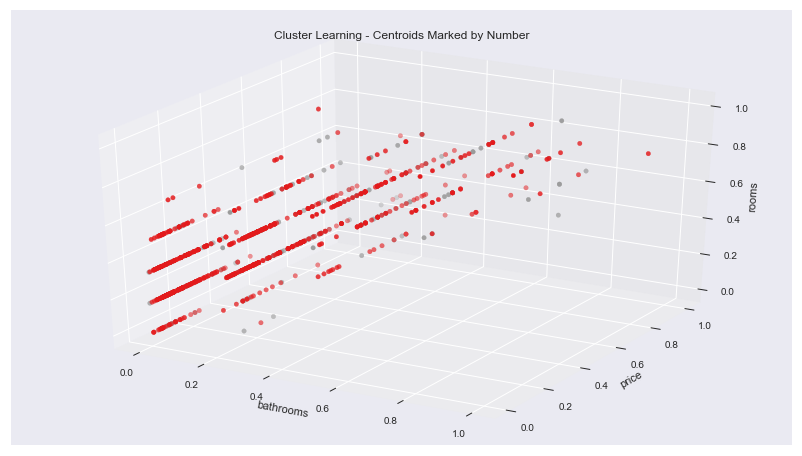

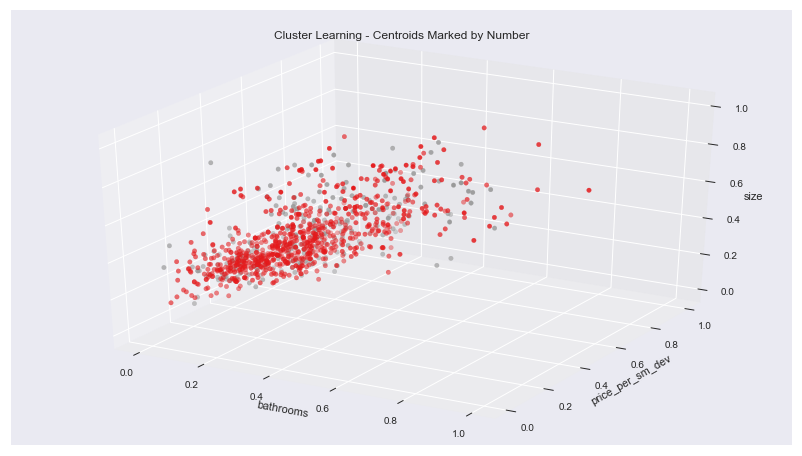

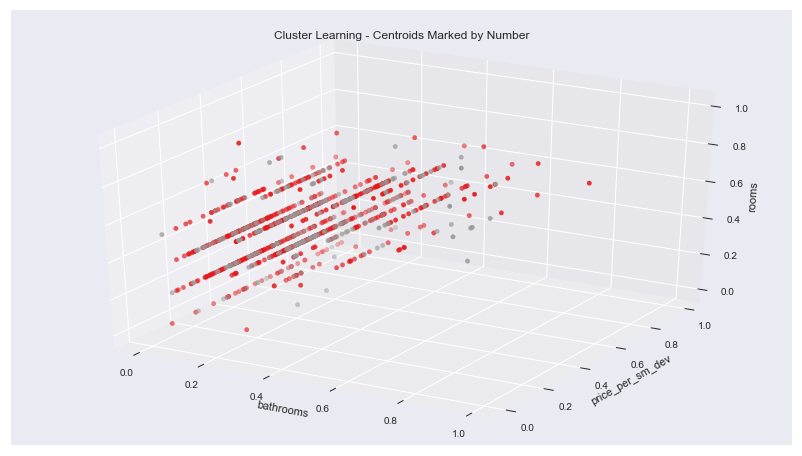

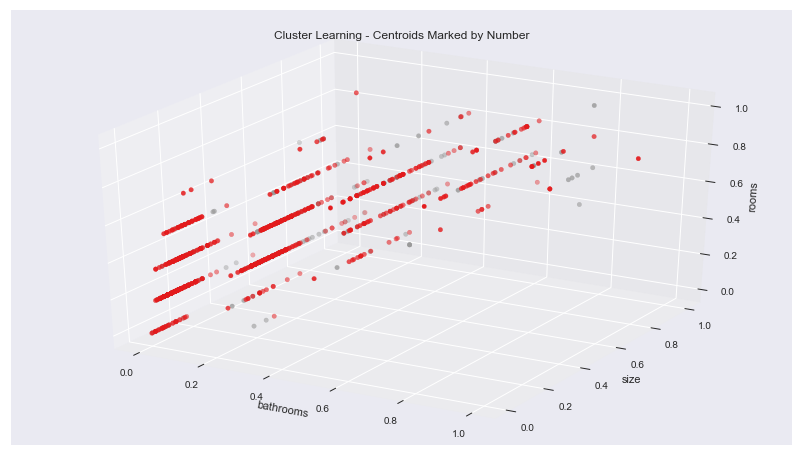

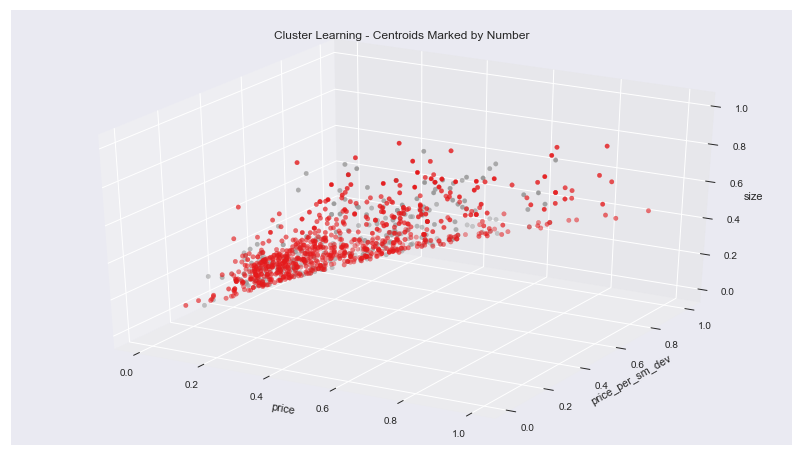

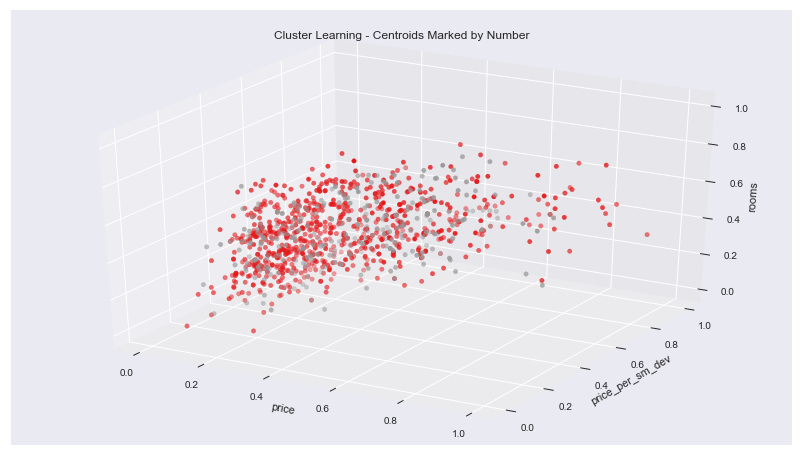

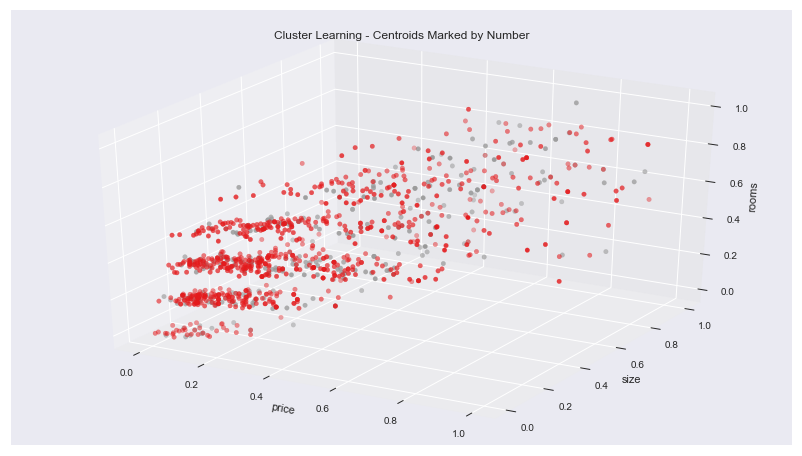

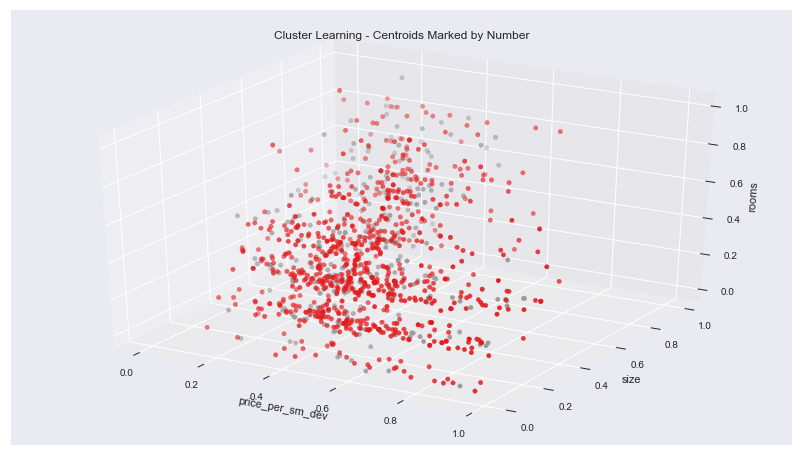

In [231]:
plot_cluster_results_3d(processed_df, best_clst["preds"], best_clst["centers"])

In [249]:
for components in range(2, 3):
    print("******************\nNumber of components: {}\n*******************".format(components))
    pca_df = apply_pca(processed_df, components)
    best_clst = cluster_support_data(pca_df, option="kmeans", n_clusters_list=range(2, 3), verbose=0)

******************
Number of components: 2
*******************
Silhouette score of 0.4502 with kmeans and 2 clusters


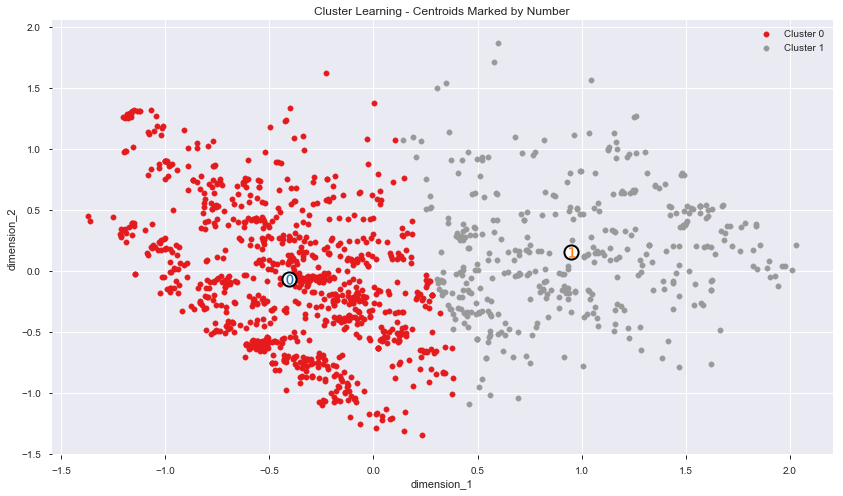

In [250]:
plot_cluster_results(pca_df, best_clst["preds"], best_clst["centers"])

In [10]:
from keras.applications.mobilenet import MobileNet
from keras.layers import Input

# this could also be the output a different Keras model or layer

model = MobileNet(input_shape=(224, 224, 3), weights='imagenet', include_top=True)
#model.save('test_model.h5')

In [11]:
imgs_list = load_imgs("./data/homes_pics", model=model, verbose=1)

100%|████████████████████████████████████| 1419/1419 [1:54:01<00:00,  1.59s/it]


In [272]:
a = model.predict(path_to_tensor("./data/homes_pics/38542516/generic_4.jpg"))

In [12]:
import pickle

pickle.dump(imgs_list, open("./data/mobilenet_features.pickle", 'wb'))

In [273]:
a.shape

(1, 1000)

In [263]:
import keras
import keras.applications.mobilenet as mobilenet

#model_path = "./core/models/mobilenet_1_0_224_tf_no_top.h5"
model_path = "./test_model.h5"
model = keras.models.load_model(model_path, custom_objects={
                   'relu6': mobilenet.relu6,
                   'DepthwiseConv2D': mobilenet.DepthwiseConv2D})

C:\Users\Javier.Garciadeleani\AppData\Local\Continuum\Anaconda2\envs\py36\lib\site-packages\keras\models.py:251: UserWarning:

No training configuration found in save file: the model was *not* compiled. Compile it manually.

